In [146]:
import pandas as pd

In [147]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df=pd.read_csv("train.csv")

In [150]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [151]:
df.shape

(1460, 81)

In [152]:
# Check how many columns have null values
df.isna().sum(axis=0).sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [153]:
#dropping the columns whch have more than 80% null data.
df.drop(['Id','PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True) 

In [154]:
df.shape

(1460, 76)

In [155]:
# Check for columns with unique values. If a column has all values as same we can drop that column
df.nunique().sort_values(ascending=True)

CentralAir          2
Street              2
Utilities           2
HalfBath            3
PavedDrive          3
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
Fireplaces          4
LotShape            4
BsmtExposure        4
BsmtFullBath        4
KitchenAbvGr        4
BsmtCond            4
KitchenQual         4
BsmtQual            4
FullBath            4
ExterQual           4
LandContour         4
MasVnrType          4
FireplaceQu         5
ExterCond           5
MSZoning            5
LotConfig           5
GarageCond          5
HeatingQC           5
Electrical          5
BldgType            5
YrSold              5
GarageQual          5
                 ... 
SaleType            9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
Exterior1st        15
Exterior2nd        16
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
Neighborhood       25
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontag

In [156]:
# Checking for highly correlated columns
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

YearBuilt     OverallQual     0.572323
YearRemodAdd  OverallQual     0.550684
              YearBuilt       0.592855
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     OverallQual     0.593007
              1stFlrSF        0.566024
              2ndFlrSF        0.687501
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      OverallQual     0.550600
              GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              FullBath        0.554784
              BedroomAbvGr    0.676620
GarageYrBlt   YearBuilt       0.825667
              YearRemodAdd    0.642277
GarageCars    OverallQual     0.600671
              GarageYrBlt     0.588920
GarageArea    OverallQual     0.562022
              GarageYrBlt     0.564567
              GarageCars      0.882475
SalePrice     OverallQual     0.790982
              TotalBsmtSF     0.613581
              1stFlrSF        0.605852
              GrLivArea  

In [157]:
# Dropping the highly correlated columns to avoid reduntant checks
df.drop(['TotalBsmtSF','GarageYrBlt','OverallQual'],axis=1,inplace=True) 

In [158]:
df.shape

(1460, 73)

In [159]:
df['Sale Price Range']=pd.cut(df['SalePrice'],[30000,90000,270000,450000,650000,800000,],
                              labels=['Very Low Cost','Low Cost','Medium Cost','High Cost','Very High Cost'],right=True)

In [160]:
print(df['SalePrice'].min())
print(df['SalePrice'].max())

34900
755000


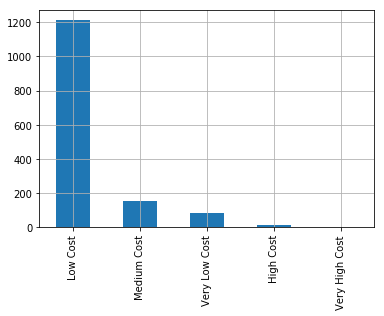

In [161]:
df['Sale Price Range'].value_counts().plot(kind='bar',grid=True)

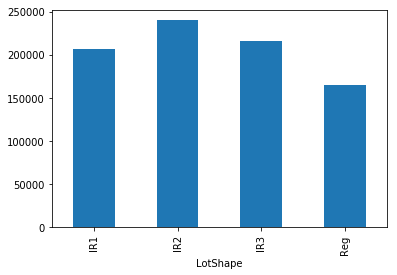

In [162]:
df.groupby(['LotShape'])['SalePrice'].mean().plot(kind='bar')

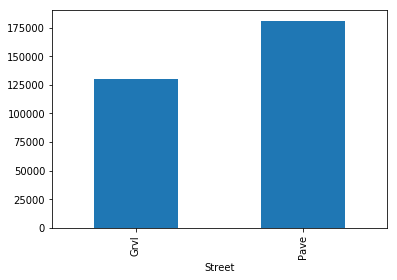

In [163]:
df.groupby(['Street'])['SalePrice'].mean().plot(kind='bar')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass          1460 non-null int64
MSZoning            1460 non-null object
LotFrontage         1201 non-null float64
LotArea             1460 non-null int64
Street              1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallCond         1460 non-null int64
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
RoofStyle           1460 non-null object
RoofMatl            1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null ob

In [165]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale Price Range
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,Low Cost
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,Low Cost
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,Low Cost
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,Low Cost
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,Low Cost
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,10,2009,WD,Normal,143000,Low Cost
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,307000,Medium Cost
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,350,11,2009,WD,Normal,200000,Low Cost
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2008,WD,Abnorml,129900,Low Cost
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,2008,WD,Normal,118000,Low Cost


In [166]:

df.isna().sum(axis=0).sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
LotConfig          0
BsmtFinSF1         0
MSZoning           0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
BsmtFinSF2         0
LotArea            0
                ... 
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
Functional         0
Heating            0
TotRmsAbvGrd       0
KitchenQual  

In [167]:
#imputing the NA value of Catagorical Column with the appropriate value
df['FireplaceQu'] = df['FireplaceQu'].fillna(value='Not Alloted')

In [168]:
#imputing the NA value of Column with the median as there are outliers.
df['LotFrontage'] =df['LotFrontage'].fillna(value=df['LotFrontage'].median())

In [169]:
#imputing the NA value of Catagorical Column with the appropriate value
df['GarageType'] = df['GarageType'].fillna(value='Not Alloted')

In [170]:
#imputing the NA value of Catagorical Column with the appropriate value
df['GarageQual'] = df['GarageQual'].fillna(value='Not Alloted')

In [171]:
#imputing the NA value of Catagorical Column with the appropriate value
df['GarageCond'] = df['GarageCond'].fillna(value='Not Alloted')

In [172]:
#imputing the NA value of Catagorical Column with the appropriate value
df['GarageFinish'] = df['GarageFinish'].fillna(value='Not Alloted')

In [173]:
#imputing the NA value of Catagorical Column with the appropriate value
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(value='Not Alloted')

In [174]:
#imputing the NA value of Catagorical Column with the appropriate value
df['BsmtExposure'] = df['BsmtExposure'].fillna(value='Not Alloted')

In [175]:
#imputing the NA value of Catagorical Column with the appropriate value
df['BsmtQual'] = df['BsmtQual'].fillna(value='Not Alloted')

In [176]:
#imputing the NA value of Catagorical Column with the appropriate value
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(value='Not Alloted')

In [177]:
#imputing the NA value of Catagorical Column with the appropriate value
df['BsmtCond'] = df['BsmtCond'].fillna(value='Not Alloted')

In [178]:
#imputing the NA value of Catagorical Column with the appropriate value
df['MasVnrType'] = df['MasVnrType'].fillna(value='None')

In [179]:
#imputing the NA value of Catagorical Column with the appropriate value
df['MasVnrArea'] = df['MasVnrArea'].fillna(value='0')

In [180]:
#imputing the NA value of Catagorical Column with the value used the most
df['Electrical'] = df['Electrical'].fillna(value='SBrkr')

In [181]:
df.isna().sum(axis=0).sort_values(ascending=False)

Sale Price Range    0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
RoofMatl            0
YearRemodAdd        0
SalePrice           0
YearBuilt           0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
                   ..
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
GarageCars          0
GarageFinish        0
GarageType          0
FullBath  

In [182]:
df.shape

(1460, 74)

In [183]:
#dropping the duplicate columns 
df=df.drop_duplicates()

In [184]:
df.shape

(1460, 74)

In [185]:
df.to_csv('CleanedTrain.csv')

In [186]:
df.drop(['Sale Price Range'],axis=1,inplace=True)

In [187]:
df.drop(index=1459,axis=0,inplace=True)

In [188]:
y=df['SalePrice']

In [189]:
df.shape

(1459, 73)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 73 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
MasVnrArea       1459 n

In [191]:
cat=df.select_dtypes(include="object")
num=df.select_dtypes(include="number")

In [192]:
num.drop(['SalePrice'],axis=1,inplace=True)

In [193]:
cat=pd.get_dummies(cat,dtype=int)

In [194]:
x=pd.concat([cat,num],axis=1)

In [195]:
x.shape,y.shape

((1459, 609), (1459,))

In [196]:
x.columnS

AttributeError: 'DataFrame' object has no attribute 'columnS'

In [197]:
x.drop(x.iloc[:, 571:609], inplace=True, axis=1)


In [198]:
x.shape

(1459, 571)

In [199]:
x_test=pd.read_csv("TestSalePrice.csv")

In [200]:
model=LinearRegression(normalize=True)
model.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [201]:
predictions=model.predict(x_test)
print(predictions)

[1.15341075e+22 4.11397626e+21 3.73303374e+21 ... 4.70072396e+21
 3.68293265e+21 3.85293668e+21]


In [202]:
predictions=model.predict(x)

In [203]:
print(predictions)

[197632. 214016. 197632. ... 212992. 291840. 160768.]


In [204]:
Pred=pd.DataFrame(predictions)

In [205]:
Pred.to_csv('MyPredictions.csv',index=0,header=False)

In [206]:
print("Mean Squared Error:",mean_squared_error(y,predictions))

Mean Squared Error: 639003902.4715558


In [227]:
print("R2 value:",r2_score(y,predictions)*100)

R2 value: 89.8737091874704


In [228]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjr2 = 1-((1-r2_score(y,predictions))*(1459-1)/(1459-571-1))

In [229]:
print(adjr2)

0.8335498082900996


In [237]:
# Running RFE with the output number of the variables equal to 200

model.fit(x,y)

# running RFE
rfe = RFE(model, 20)             
rfe = rfe.fit(x,y)

In [238]:
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
  n_features_to_select=20, step=1, verbose=0)

In [63]:
# Examining the independent variables
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('MSZoning_C (all)', False, 531),
 ('MSZoning_FV', False, 535),
 ('MSZoning_RH', False, 534),
 ('MSZoning_RL', False, 533),
 ('MSZoning_RM', False, 532),
 ('Street_Grvl', False, 476),
 ('Street_Pave', False, 477),
 ('LotShape_IR1', False, 521),
 ('LotShape_IR2', False, 523),
 ('LotShape_IR3', False, 524),
 ('LotShape_Reg', False, 522),
 ('LandContour_Bnk', False, 61),
 ('LandContour_HLS', False, 58),
 ('LandContour_Low', False, 59),
 ('LandContour_Lvl', False, 60),
 ('Utilities_AllPub', False, 42),
 ('Utilities_NoSeWa', False, 16),
 ('LotConfig_Corner', False, 473),
 ('LotConfig_CulDSac', False, 475),
 ('LotConfig_FR2', False, 471),
 ('LotConfig_FR3', False, 474),
 ('LotConfig_Inside', False, 472),
 ('LandSlope_Gtl', False, 49),
 ('LandSlope_Mod', False, 50),
 ('LandSlope_Sev', False, 51),
 ('Neighborhood_Blmngtn', False, 542),
 ('Neighborhood_Blueste', False, 543),
 ('Neighborhood_BrDale', False, 559),
 ('Neighborhood_BrkSide', False, 550),
 ('Neighborhood_ClearCr', False, 548),
 ('N

In [214]:
# Examining the independent variables of interest (200 independent variables got through RFE)
col = x.columns[rfe.support_]

In [232]:
pd.set_option('display.max_columns', 500)

In [234]:
col.tolist()

['LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'RoofMatl_Roll',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_CBlock',
 'MasVnrArea_34.0',
 'MasVnrArea_42.0',
 'MasVnrArea_66.0',
 'MasVnrArea_88.0',
 'MasVnrArea_96.0',
 'MasVnrArea_99.0',
 'MasVnrArea_100.0',
 'MasVnrArea_102.0',
 'MasVnrArea_119.0',
 'MasVnrArea_123.0',
 'MasVnrArea_138.0',
 'MasVnrArea_165.0',
 'MasVnrArea_176.0

In [ ]:
#Top columns contributing to affect the SalePrice.
'LandContour', 'Utilities', 'LandSlope','Condition2','RoofMatl','Exterior1st','MasVnrArea','ExterQual','BsmtQual','HeatingQC','CentralAir','Electrical','GarageFinish','SaleType'